La regresión logística es un algoritmo de aprendizaje supervisado utilizado para la clasificación de datos. A diferencia de la regresión lineal, que se utiliza para problemas de regresión, la regresión logística se emplea para problemas de clasificación binaria o multiclase.

La idea fundamental detrás de la regresión logística es modelar la relación entre las variables independientes (características o atributos) y la variable dependiente (etiquetas de clase) utilizando una función logística (también conocida como sigmoide). La función logística toma cualquier valor real y lo mapea a un rango entre $0$ y $1$, es decir, probabilidades. Entonces se puede entender que dados un conjunto de datos entrada es posible obtener una clasificación a partir del modelo.

La forma general de la función logística es:

$$sigmoid(z)=\frac{1}{(1+e^{-z})}$$

En el contexto de la regresión logística, la variable $z$ es la combinación lineal de las variables independientes ponderadas por los coeficientes del modelo. La función logística se aplica a $z$ para obtener la probabilidad de que una muestra pertenezca a una clase específica.

Aquí un ejemplo sencillo:


In [40]:
import numpy as np
from sklearn.linear_model import LogisticRegression

# Datos de entrenamiento
X_train = np.array([[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]])
y_train = np.array([0, 0, 0, 1, 1, 1])

# Crear el modelo de regresión logística
modelo = LogisticRegression()

# Entrenar el modelo
modelo.fit(X_train, y_train)

# Datos de prueba
X_test = np.array([[2, 2], [4, 1], [5, 5]])
y_test = np.array([0, 0, 1])

# Realizar predicciones
predictions = modelo.predict(X_test)

# Calcular la precisión del modelo
accuracy = np.mean(predictions == y_test)
print("Precisión: {:.2f}%".format(accuracy * 100))

# Obtener los coeficientes del modelo
coef = modelo.coef_
intercepto = modelo.intercept_

print(coef,intercepto)

Precisión: 100.00%
[[1.08671177 0.45797507]] [-4.87989555]


En este ejemplo el vector *X_train* $(1,2)$, $(2,3)$... están ubicados en la clasificación $0$... y así sucesivamente. El objetivo es crear un modelo en el que se pronostique la clasificación de datos inéditos.

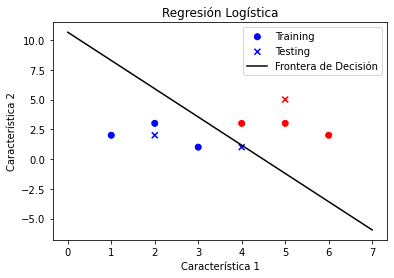

In [42]:
import matplotlib.pyplot as plt

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', label='Training')

# Crear un gráfico de dispersión de los datos de prueba
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='bwr', marker='x', label='Testing')

# Graficar la frontera de decisión
x1 = np.linspace(0, 7, 100)
x2 = (-coef[0, 0] * x1 - intercept) / coef[0, 1]
plt.plot(x1, x2, color='black', label='Frontera de Decisión')

# Configurar etiquetas y título del gráfico
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Regresión Logística')
plt.legend()


Notar que los puntos azules pertenecen a la clasificación $0$; los rojos a la clasificación $1$. La frontera de decisión separa las clasificaciones para entender mejor la agrupación.

In [48]:
X_inédito = np.array([[2, 0], [5, 3], [2, 5],[0,0]])

# Realizar predicciones
predictions = modelo.predict(X_inédito)
predictions

array([0, 1, 0, 0])

En este caso, las predicciones para datos inéditos se pueden interpretar en la gráfica. Entonces este modelo sencillo tiene la esencia de la regresión logística.

In [80]:
# Comprobar la validez de la ecuación
datos_compr = np.array([[3, 0]])  # Datos de entrada para comprobar

# Calcular el valor de z
z = np.dot(datos_compr, coef.T) + intercepto #notar que ".T" es tranpuesto

# Aplicar la función logística
prob = 1 / (1 + np.exp(-z))

# Imprimir los resultados
print("Valor de z:", z)
print("Probabilidad estimada:", prob)

# Comparar con el umbral de decisión
umbral = 0.2
clase_predicha = 1 if prob > umbral else 0
print("Clase predicha:", clase_predicha)

Valor de z: [[-1.61976024]]
Probabilidad estimada: [[0.16523794]]
Clase predicha: 0


Es importante mencionar que la clase positiva es $1$; la negativa $0$.

La clase que se quiere predecir es $1$ por lo que si $prob$ es mayor que $umbral$ entonces pertenece a la clase $1$, si es menor pertenece a la clase $0$. Las probabilidades sirven para saber qué valores se van a asignar a cada clase como se acaba de ver.

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer


import pandas as pd
# Datos de ejemplo
datos = pd.DataFrame({'Género': ['Masculino', 'Femenino', 'Masculino', 'Femenino'],
                     'Edad': [25, 30, 35, 40],
                     'Salario': [50000, 60000, 70000, 80000],
                     'Compró': ['No', 'No', 'Sí', 'Sí']})

# Codificar variables categóricas
label_encoder = LabelEncoder()
datos['Género_encoded'] = label_encoder.fit_transform(datos['Género'])

# Separar características y variable objetivo
X = datos[['Género_encoded', 'Edad', 'Salario']]
y = datos['Compró']

# Transformar variables categóricas a variables ficticias (one-hot encoding)
transformer = ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(), [0])],
                                remainder='passthrough')
X = transformer.fit_transform(X)

# Ajustar el modelo de regresión logística
model2 = LogisticRegression()
model2.fit(X, y)

# Coeficientes y término constante del modelo
coefficients = model2.coef_
intercept = model2.intercept_

# Imprimir los resultados
print("Coeficientes:", coefficients)
print("Término constante:", intercept)



Coeficientes: [[-1.26545691e-01  4.53531014e-02  5.17745313e-07  1.03549068e-03]]
Término constante: [-67.26749086]


C:\Users\kevin\Dropbox\Python 3.9\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
